In [1]:
import numpy as np
import xarray as xr
import pandas as pd


import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.dates import DateFormatter
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
plt.rcParams['figure.figsize'] = (10, 4)

import datetime
import os

import locale 
locale.setlocale(locale.LC_TIME, "es_ES");


from globales import *

# Inicio 

In [2]:
analisisDir   = GlobalSU['AnaPath'] + '/SSTGlobalAnalysis/'
imagesDir     = GlobalSU['AnaPath'] + '/SSTGlobalAnalysis/images'

In [3]:
Titulos = ['Iberian Canary Basin','Demarcación marina levantino-balear', 'Demarcación marina noratlántica','Demarcación marina canaria','Demarcación sudatlántica','Demarcación Estrecho y Alborán']
Titulos_short = ['IBICan','LEB', 'NOR','CAN','SUD','ESA']


In [4]:
it=1

In [5]:
titulo = Titulos[it]
titulo_short = Titulos_short[it]
print(titulo)

Demarcación marina levantino-balear


In [6]:
Title  = 'Anomalía de temperatura superficial en la '+ titulo
FileIn =  analisisDir+'/data/sstLDMUR_anom_'+titulo_short+'.nc'
FileOut = analisisDir+'/images/map_sstdMUR_anom_'+titulo_short+'.png'

In [7]:
data = xr.open_dataset(FileIn)
sst = data.analysed_sst

FileNotFoundError: [Errno 2] No such file or directory: '/home/pvb/Analisis/SSTGlobalAnalysis/data/sstLDMUR_anom_LEB.nc'

# Figura

In [8]:
escalaLand='50m'

In [9]:
lon, lat = [], []
if titulo_short == 'CAN' or titulo_short == 'ESA' or titulo_short ==  'LEB' or titulo_short ==  'NOR' or titulo_short ==  'SUD' :
    with open('./data/Demarcacion'+titulo_short+'.txt', 'r') as f:
        for line in f:
            longitude, latitude = map(float, line.split())
            lon.append(longitude)
            lat.append(latitude)

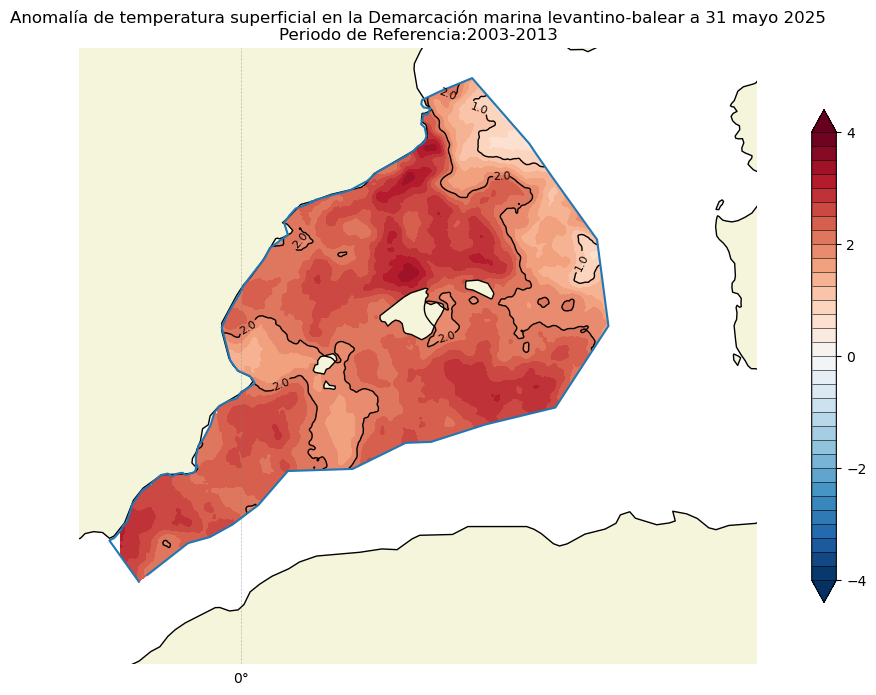

In [10]:
fig = plt.figure(figsize=(14,8))

ax = plt.axes(projection=ccrs.Mollweide(),frameon=False)
ax.patch.set_visible(False)

land = cartopy.feature.NaturalEarthFeature('physical', 
                'land', edgecolor='k', scale = escalaLand ,
                facecolor=cfeature.COLORS['land'])
ax.add_feature(land, facecolor='beige')
    
cm=ax.contourf(sst.lon,sst.lat,sst, levels=np.arange(-4,4.1,0.25), 
               transform=ccrs.PlateCarree(),
               cmap = plt.cm.RdBu.reversed(),
               vmin = -4,vmax = 4,extend='both')

cl = ax.contour(sst.lon,sst.lat,sst, levels=[-2,-1,1,2],
                           colors='black', linewidths=1,
                           transform=ccrs.PlateCarree())

ax.clabel(cl, inline=True, fontsize=8, fmt="%1.1f")

ax.plot(lon, lat, transform=ccrs.PlateCarree())

cbar=fig.colorbar(cm,ax=ax, location='right',
                  shrink=.8, ticks=[-4,-2,0,2,4], 
                  drawedges=True)

gd=ax.gridlines(draw_labels=True, linewidth=.5, color='gray', alpha=0.5, linestyle='--',x_inline=False, y_inline=False)
gd.ylocator = mticker.FixedLocator([25, 35, 45])
gd.xlocator = mticker.FixedLocator([-30, -20, -10,0])
gd.left_labels = False
gd.top_labels = False

ax.set_title(Title + ' a ' + sst.time.dt.strftime("%d %B %Y").values + '\n' + 'Periodo de Referencia:'+sst.attrs['yearC1']+'-'+sst.attrs['yearC2']);

In [11]:
cl = ax.contour(sst.lon,sst.lat,sst, levels=[-2,-1,1,2],
                           colors='black', linewidths=1,
                           transform=ccrs.PlateCarree())


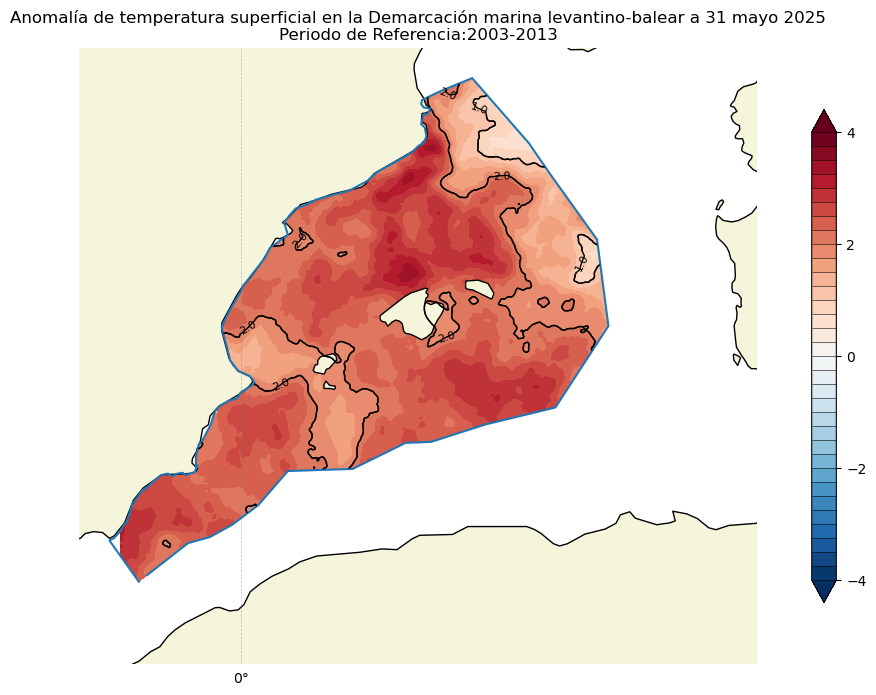

In [12]:
fig